In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [4]:
from google.colab import files
uploaded = files.upload()


Saving spotify_synthetic_popularity_dataset.csv to spotify_synthetic_popularity_dataset (1).csv


In [5]:
df = pd.read_csv("spotify_synthetic_popularity_dataset.csv")
df.shape

(1000, 11)

In [6]:
df.head()


,danceability,energy,loudness,valence,tempo,speechiness,acousticness,instrumentalness,duration_ms,liveness,popularity
0,0.724507,0.979871,-9.025535,0.168438,98.412660,0.123902,0.095922,0.266838,293933,0.194173,62
1,0.629260,0.884927,-7.433556,0.377923,119.219913,0.310603,0.312084,0.361697,154946,0.169532,50
2,0.747153,0.711926,-9.377260,0.467279,120.450422,0.087657,0.091315,0.028901,169884,0.292880,66
3,0.878454,0.570613,-7.923885,0.927538,131.815759,0.279187,0.098179,0.074036,166360,0.433220,72
4,0.614877,0.839645,-12.680844,0.661311,85.828541,0.178022,0.140693,0.068981,183252,0.230876,77


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   valence           1000 non-null   float64
 4   tempo             1000 non-null   float64
 5   speechiness       1000 non-null   float64
 6   acousticness      1000 non-null   float64
 7   instrumentalness  1000 non-null   float64
 8   duration_ms       1000 non-null   int64  
 9   liveness          1000 non-null   float64
 10  popularity        1000 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 86.1 KB


In [8]:
df.describe()

,danceability,energy,loudness,valence,tempo,speechiness,acousticness,instrumentalness,duration_ms,liveness,popularity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.652303,0.707450,-6.982497,0.545686,118.901083,0.170712,0.283800,0.115591,235981.421000,0.202937,62.447000
std,0.145208,0.186845,2.950363,0.203517,24.455954,0.106593,0.157020,0.096959,70810.573682,0.120378,10.430723
min,0.163810,0.111922,-16.058536,0.000000,60.000000,0.002842,0.008203,0.000124,120818.000000,0.007304,30.000000
25%,0.552861,0.578752,-8.943999,0.402516,102.934876,0.090356,0.162585,0.040913,171983.500000,0.109905,55.000000
50%,0.653795,0.712615,-7.000752,0.550037,119.543950,0.148307,0.257693,0.089889,232998.500000,0.186483,63.000000
75%,0.747192,0.845776,-5.017254,0.683389,135.978078,0.236427,0.386166,0.164275,298448.000000,0.271854,69.000000
max,1.000000,1.000000,4.778713,1.000000,197.822755,0.601182,0.806254,0.539380,359939.000000,0.675672,94.000000


In [9]:
df.isna().sum()

,0
danceability,0
energy,0
loudness,0
valence,0
tempo,0
speechiness,0
acousticness,0
instrumentalness,0
duration_ms,0
liveness,0


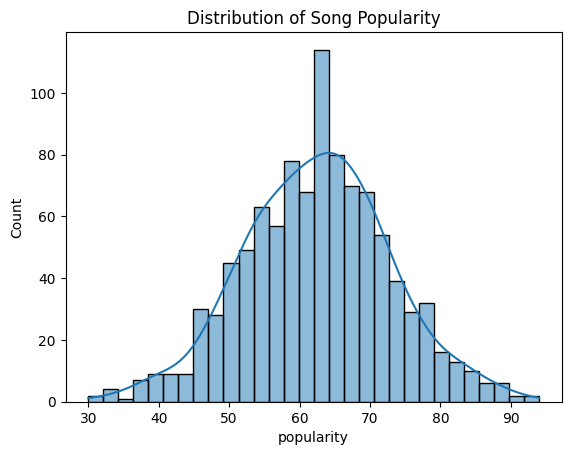

In [10]:
sns.histplot(df["popularity"], bins=30, kde=True)
plt.title("Distribution of Song Popularity")
plt.show()

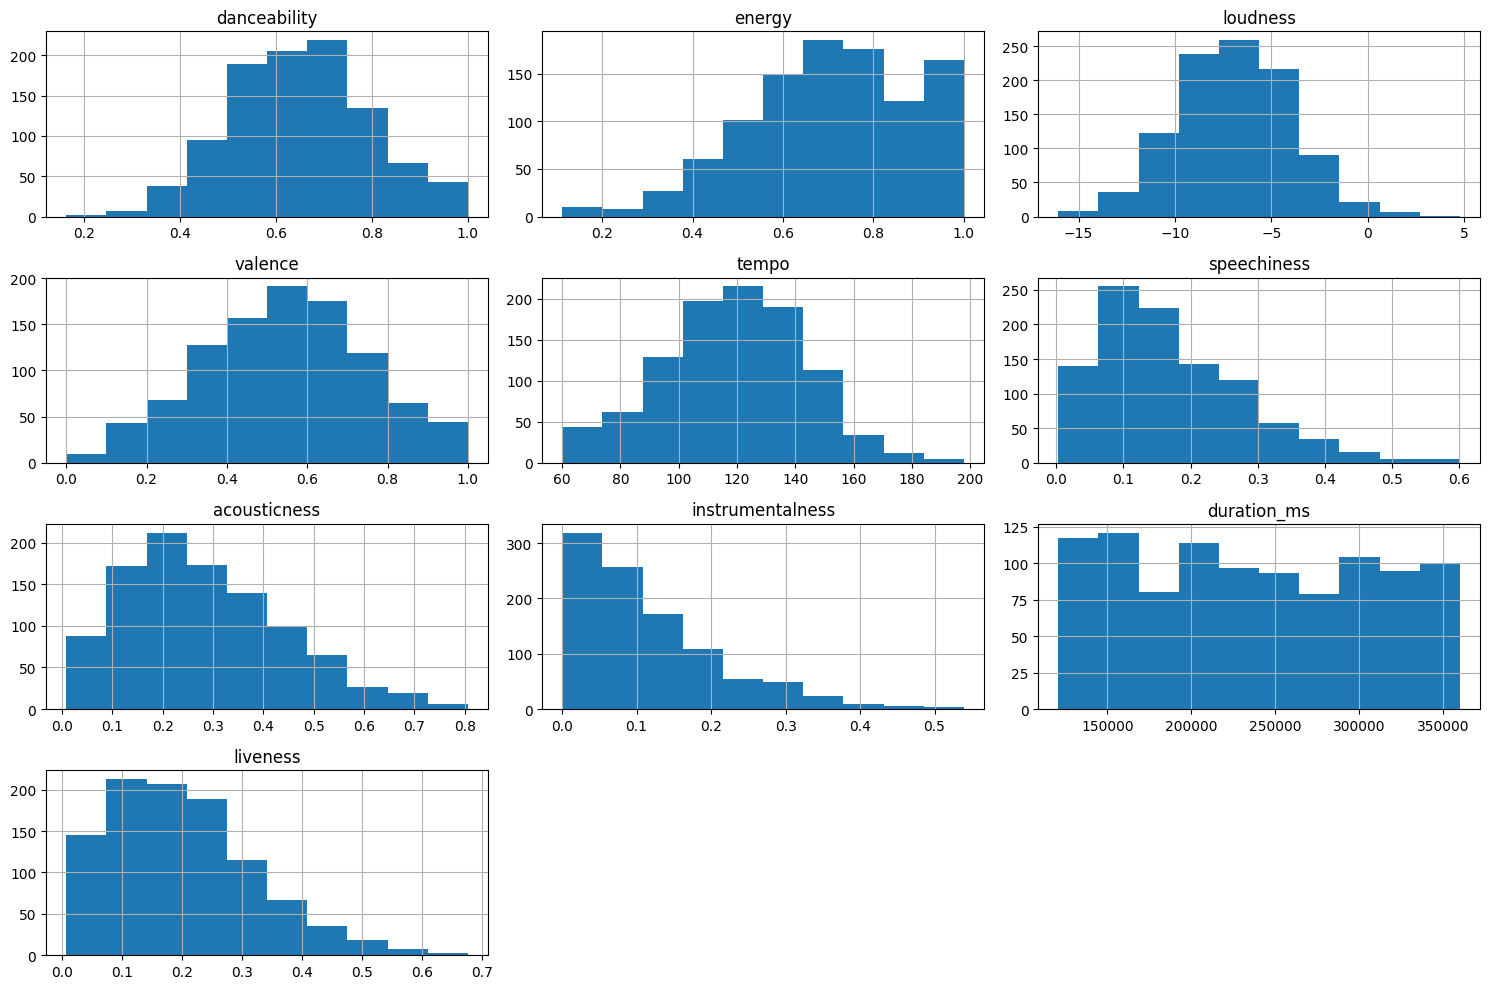

In [11]:
df.drop(columns="popularity").hist(figsize=(15,10))
plt.tight_layout()
plt.show()

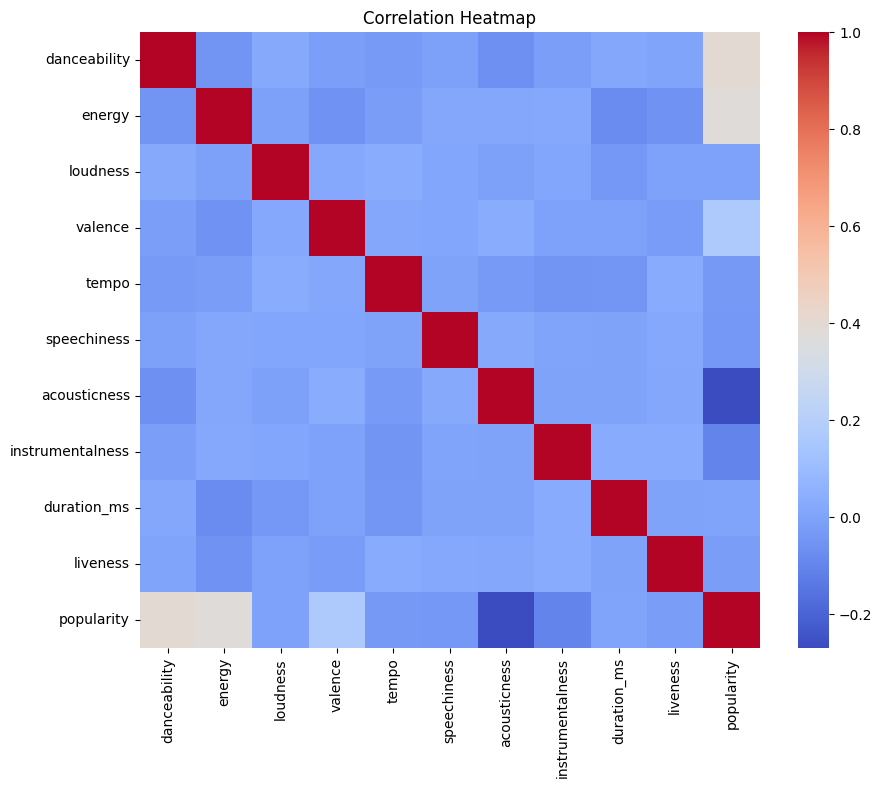

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
X = df.drop(columns="popularity")
y = df["popularity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.41687654662239937
MAE: 6.61395


In [15]:
importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance

,0
danceability,0.215793
energy,0.211434
acousticness,0.130590
valence,0.105385
instrumentalness,0.066098
liveness,0.061020
speechiness,0.059363
loudness,0.054988
duration_ms,0.049835
tempo,0.045494


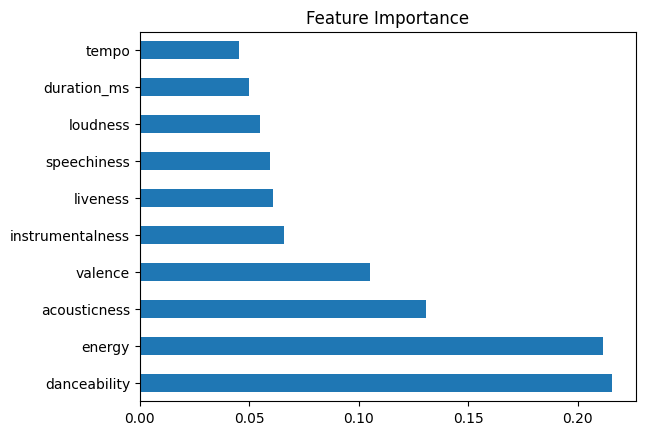

In [16]:
importance.plot(kind="barh")
plt.title("Feature Importance")
plt.show()